In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing Train and Test Datasets

In [4]:
train= pd.read_excel(r'C:\Users\Harshitha\Desktop\Data Trained\Projects\Final Participant Data Folder\Final_train.xlsx')

In [5]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
test= pd.read_excel(r'C:\Users\Harshitha\Desktop\Data Trained\Projects\Final Participant Data Folder\Final_test.xlsx')

In [7]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [8]:
train.shape

(5961, 7)

In [9]:
test.shape

(1987, 6)

In [10]:
#EDA

In [11]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [12]:
#lets check the data types
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [13]:
# except the Fees columns all are of Object types.

In [14]:
#lets check the null value present in our data set
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [15]:
#we can observe that out of total 5961 data there is 3302 data which is null in Rating columns. ** place columns having null value present 25 ** miscellaneous_info is having 2620 null values, lets drop this columns cause this columns doesnt has impact on my target variable.

In [16]:
#lets drop Miscellaneous_Info
train.drop(columns='Miscellaneous_Info',inplace=True)

In [17]:
train
# below we can observe Miscellaneous_Info is dropped

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [19]:
#lets fill the null value with the most frequent value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
col=['Rating','Place']
for i in col:
    train[i]=imp.fit_transform(train[i].values.reshape(-1,1))


In [20]:
#lets check the null value again
train.isnull().sum()
# we can observe there is no null value present in the dataset

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [21]:
#lets check the information about the train datasets.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         5961 non-null   object
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


In [22]:
#we can observe that all the columns are object type except the fees columns. 2. Before going further we have to chenge the columns data types because our model doesnt undersatnd these string values.

In [23]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [24]:
#1. maximum Fees charge by doctor =950 2. minimum fees charge by doctor =5 3. we can observe that there mean is greater than media so my data is right skewed. 4. we can also observe that there is difference in 75% and maximum so we can observe some outliers in the dataset.

In [25]:
#EDA

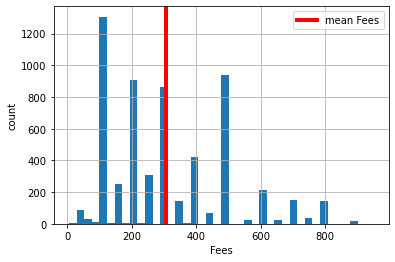

In [27]:
# lets check the mean fees
Fees = train['Fees'].hist(bins=40)
mean_val= np.mean(train['Fees'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [28]:
#we can observe the mean fees charge by any doctor is 300.

In [29]:
#before mving further lets explore column and try to delete the alphabetical value.
#lets delete the alpha value from experience column and make the dtype int.
train['Experience'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
train['Experience'] = train['Experience'].astype('int')
#lets delete the alpha value from experience column and make the dtype int.
train['Rating'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
train['Rating'] = train['Rating'].astype('int')

In [30]:
#univariate analysis

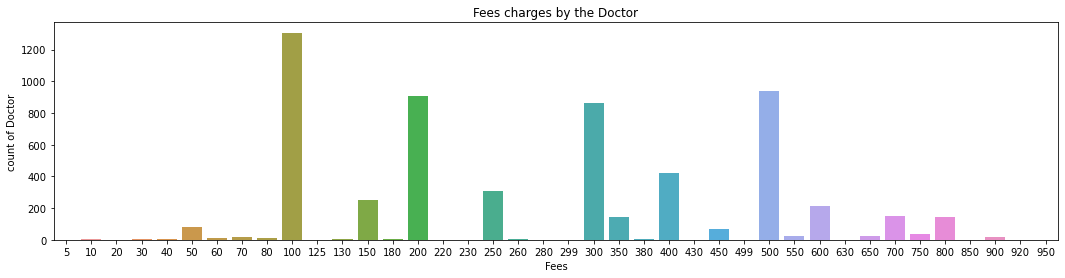

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
70       18
900      18
80       12
60       11
30        4
180       2
130       2
380       2
10        2
40        2
260       2
299       1
950       1
850       1
630       1
20        1
125       1
430       1
230       1
5         1
920       1
280       1
220       1
499       1
Name: Fees, dtype: int64

In [31]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Fees',data=train)
plt.title('Fees charges by the Doctor')
plt.xlabel('Fees')
plt.ylabel('count of Doctor')
plt.show()
train['Fees'].value_counts()


In [33]:
#1. we can observe that almost 1306 doctor charges Rs.100 for there consultation. 2. Almost 938 Doctor charges Rs 500 for there consultation. 4. The maximum charge taken by any doctor is Rs.950, which is 1 in counts.

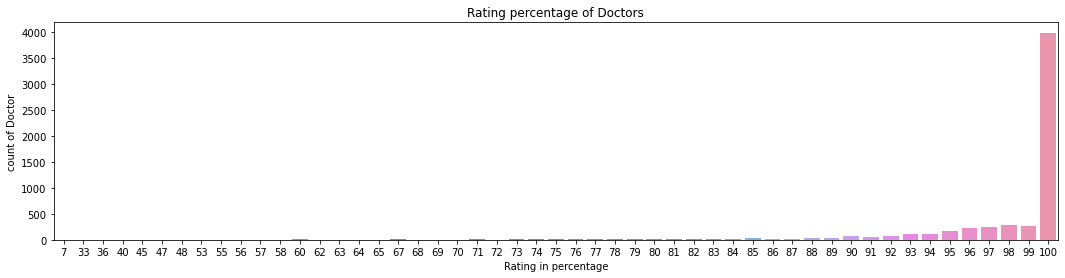

In [32]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=train)
plt.title('Rating percentage of Doctors')
plt.xlabel('Rating in percentage')
plt.ylabel('count of Doctor')
plt.show()

In [34]:
#1. we can observe almost 3986 doctor is having rating 100 %. 2. Where as the least rating we can observe is 7% for 1 Doctor.

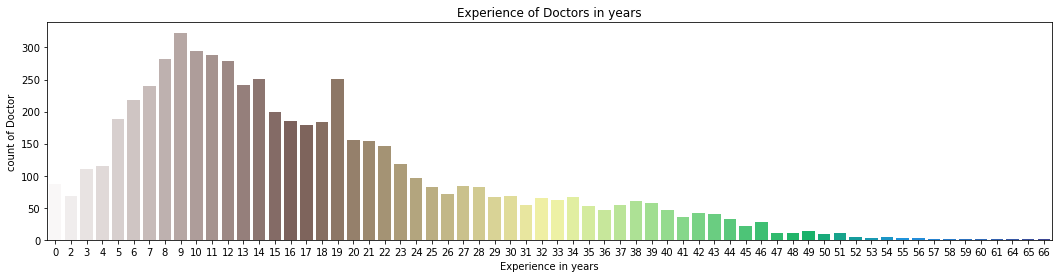

9     323
10    294
11    288
8     282
12    279
     ... 
58      1
61      1
64      1
60      1
59      1
Name: Experience, Length: 64, dtype: int64

In [35]:

plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=train,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('count of Doctor')
plt.show()
train['Experience'].value_counts()

In [36]:
# 1. maximum experience of Doctor we can observe is 66 years having cout of 1 Doctor in number. 2. 323 numbers of the doctor having experience of 9 years hich is the most count of doctor in numbers. 3. 294 numbers of doctor is having 10 years of experience

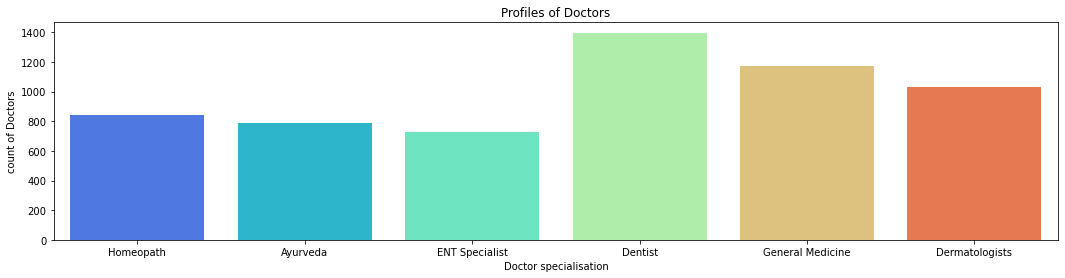

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [37]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=train,palette='rainbow')
plt.title('Profiles of Doctors')
plt.xlabel('Doctor specialisation')
plt.ylabel('count of Doctors')
plt.show()
train['Profile'].value_counts()

In [38]:
#1. we have more number of Dentist doctor which is 1397 in counts. 2. General medicine doctors 1173 counts in number. 3. the least doctors in count we can observe is ENT Specialist 728 doctors

In [39]:
#Bivariate analysis

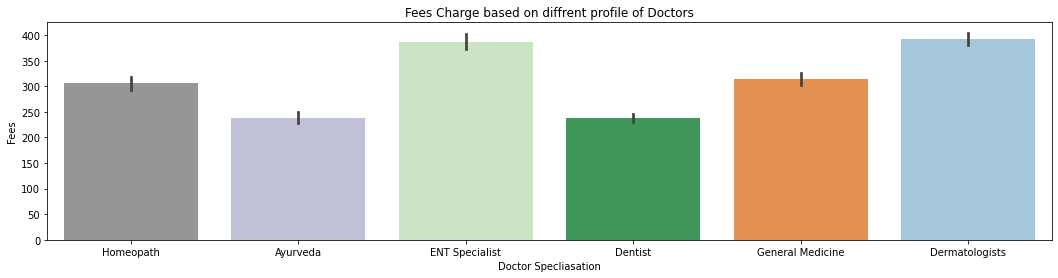

In [43]:
#fee vs profile
plt.subplots(figsize=(18,4))
sns.barplot(x='Profile',y='Fees',data=train,palette='tab20c_r')
plt.title('Fees Charge based on diffrent profile of Doctors')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Fees')
plt.show()

In [45]:
#1. maximum fees charged on the basis of there profile by the doctor who specilise in the field of: ** ENT ** Dermatologists. 2. The least charges we can observe for the Ayurveda and Dentist.

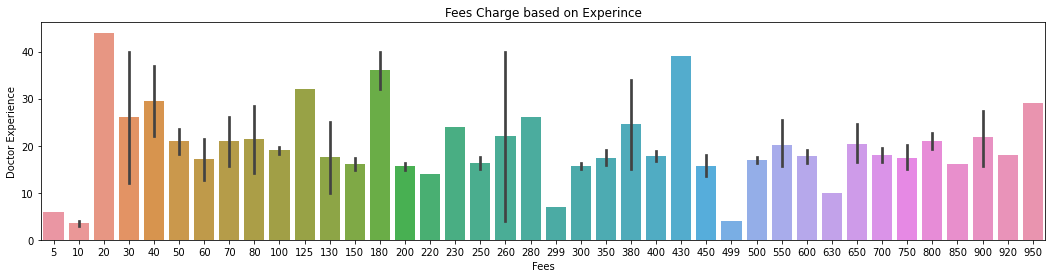

In [44]:
plt.subplots(figsize=(18,4))
sns.barplot(x='Fees',y='Experience',data=train)
plt.title('Fees Charge based on Experince')
plt.xlabel('Fees')
plt.ylabel('Doctor Experience')
plt.show()

In [46]:
#1. Maximum fees charge by the doctor with Experience more than 25 years of experience.

In [47]:
#fee vs rating

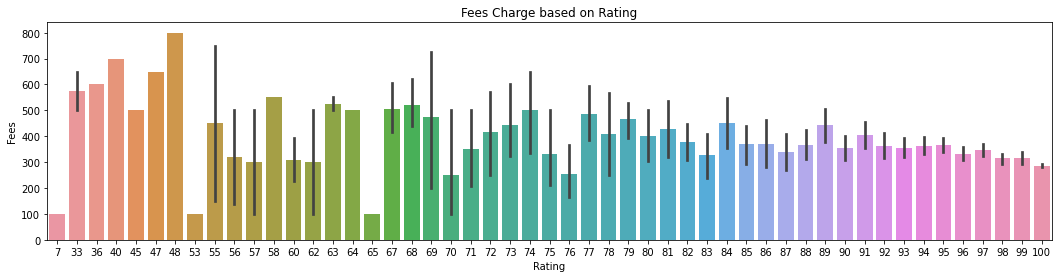

In [48]:
plt.subplots(figsize=(18,4))
sns.barplot(x='Rating',y='Fees',data=train)
plt.title('Fees Charge based on Rating')
plt.xlabel('Rating')
plt.ylabel('Fees')
plt.show()

In [49]:
#1. we can observe that the doctor rating with 100 % having minimum charge 300.

In [50]:
#profile vs experience

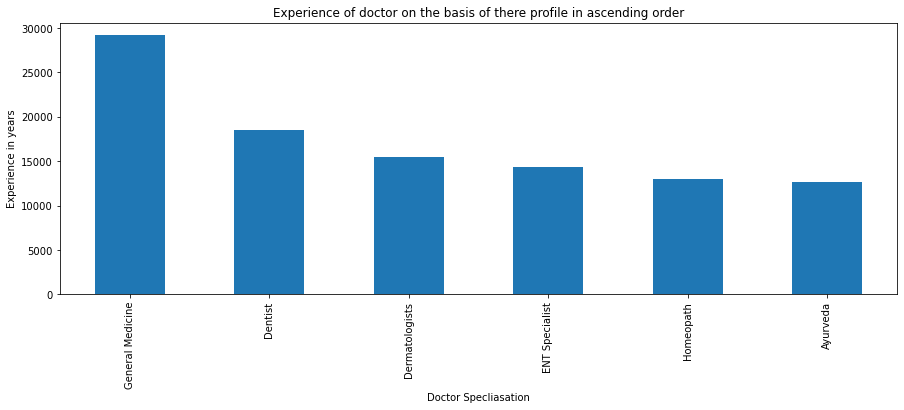

In [51]:

plt.subplots(figsize=(18,4))
train.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Experience of doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Experience in years')
plt.show()

In [52]:
#1. we can observe the maximum experience by the Greneral medicine doctors, where as the least experience we can observe f from the profile beongs to Ayurveda

In [53]:
#Profile vs Fees in ascending order

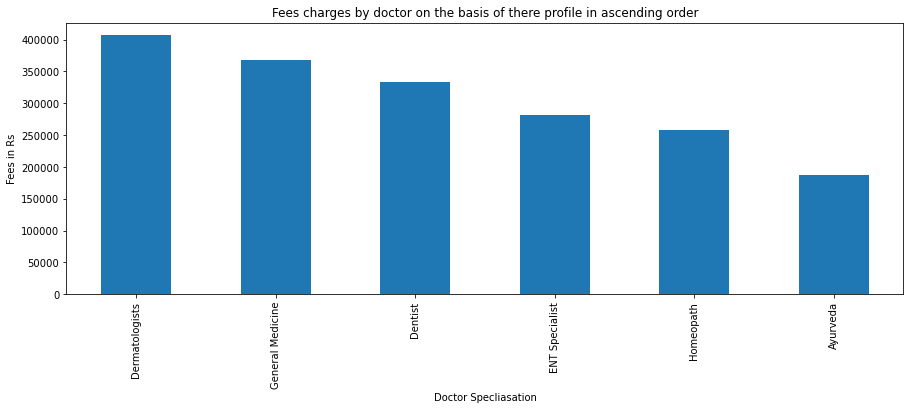

In [54]:
plt.subplots(figsize=(18,4))
train.groupby('Profile')['Fees'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Fees charges by doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Fees in Rs')
plt.show()

In [55]:
#1. we can observe above that based on profile the maximum consulattion fees is taken by the doctor who is in the field of Dermotologists followed by General medicine 2. The least fee charged by Ayurveda profile Doctor.

In [56]:
#Profile vs Rating in ascending order

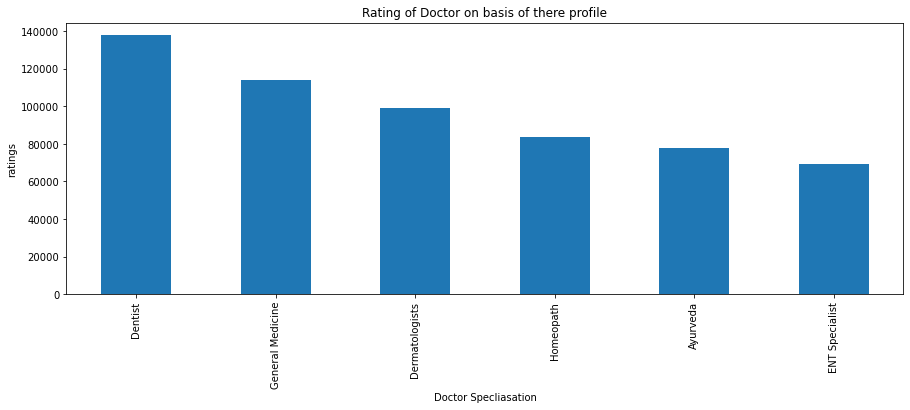

In [57]:
plt.subplots(figsize=(18,4))
train.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating of Doctor on basis of there profile')
plt.xlabel('Doctor Specliasation')
plt.ylabel('ratings')
plt.show()

In [58]:
#1. we can observe that the best rating of doctor in the profile of Dentists. 2. Least rating we can observe by the ENT specialist

In [59]:
#Multivariate Analysis

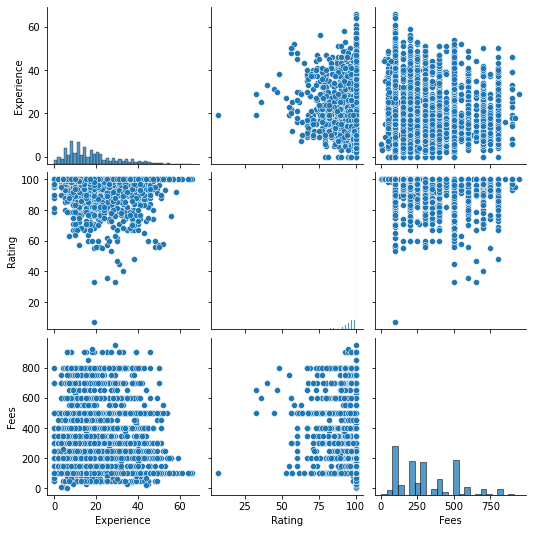

In [60]:
sns.pairplot(train)

In [61]:
#lets drop Qualification and Place and convert the profile to int datatypes.
train.drop(['Qualification','Place'],inplace=True,axis=1)

In [62]:
#lets convert the the profile categorical data to int type using label encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Profile']=le.fit_transform(train['Profile'])
train

,Experience,Rating,Profile,Fees
0,24,100,5,100
1,12,98,0,350
2,9,100,3,300
3,12,100,0,250
4,20,100,0,250
...,...,...,...,...
5956,19,98,3,300
5957,33,100,4,100
5958,41,97,4,600
5959,15,90,4,100


In [63]:
#Now we have converted all the necessary columns to numeric type lets check the summary statistics

In [64]:
#Test data

In [65]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [67]:
#now we can repeat the same procedure with the test data once again so i am just copying all the code in single columns


In [68]:
#lets check the shape
test.shape

(1987, 6)

In [69]:
#lets check the data types
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [70]:
#lets check the null value present in our data set
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [71]:
#we can observe that out of total 1987 data there is 1090 data which is null in Rating columns. ** place columns having null value present 6 ** miscellaneous_info is having 834 null values, lets drop this columns cause this columns doesnt has impact on my target. variable.

In [72]:
test.drop(columns='Miscellaneous_Info',inplace=True)
test
# below we can observe Miscellaneous_Info is dropped.

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [73]:
#lets fill the null value with the most frequent value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
col=['Rating','Place']
for i in col:
    test[i]=imp.fit_transform(test[i].values.reshape(-1,1))


In [74]:
#lets check the null value again
test.isnull().sum()
# we can observe there is no null value present in the dataset

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [75]:
#EDA

In [76]:
#before moving further lets explore column and try to delete the alphabetical value.
#lets delete the alpha value from experience column and make the dtype int.
test['Experience'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
test['Experience'] =test['Experience'].astype('int')
#lets delete the alpha value from experience column and make the dtype int.
test['Rating'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
test['Rating'] = test['Rating'].astype('int')

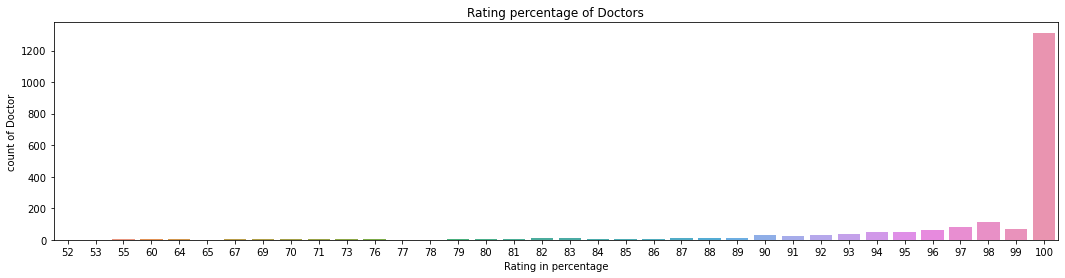

100    1313
98      112
97       84
99       68
96       65
94       51
95       47
93       34
92       29
90       29
91       26
88       13
87       11
89       11
83       11
82        9
85        8
80        7
84        7
71        7
86        6
73        5
67        5
60        4
70        4
76        4
81        3
55        3
69        2
79        2
64        2
77        1
78        1
65        1
53        1
52        1
Name: Rating, dtype: int64

In [77]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=test)
plt.title('Rating percentage of Doctors')
plt.xlabel('Rating in percentage')
plt.ylabel('count of Doctor')
plt.show()
test['Rating'].value_counts()

In [78]:
#1. we can observe almost 1313 doctor is having rating 100%. 2. Where as the least rating we can observe is 52% for 1 Doctor.

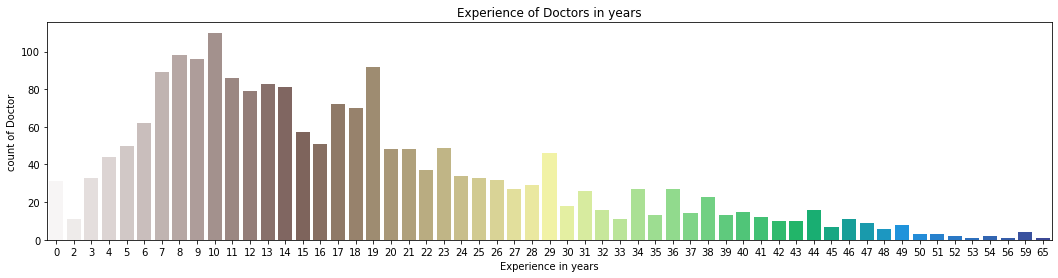

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64

In [79]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=test,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('count of Doctor')
plt.show()
test['Experience'].value_counts()

In [80]:
#1. maximum experience of Doctor we can observe is 65 years having count of 1 Doctor in number. 2. 110 numbers of the doctor having experience of 10 years which is the most count of doctor in numbers. 3. 98 numbers of doctor is having 8 years of experience.

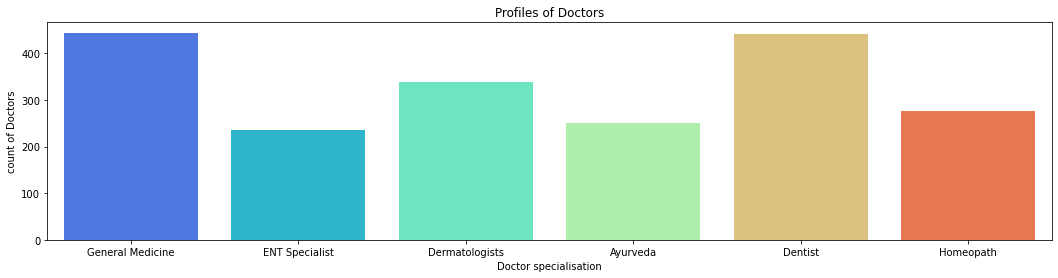

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [81]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=test,palette='rainbow')
plt.title('Profiles of Doctors')
plt.xlabel('Doctor specialisation')
plt.ylabel('count of Doctors')
plt.show()
test['Profile'].value_counts()

In [82]:
#1. we have more number of General medicine doctor which is 444 in counts. 2. Dentist doctors 441 counts in number. 3. the least doctors in count we can observe is ENT Specialist 235 doctors


In [83]:
#Bivariate analysis

In [84]:
#Rating vs Profile

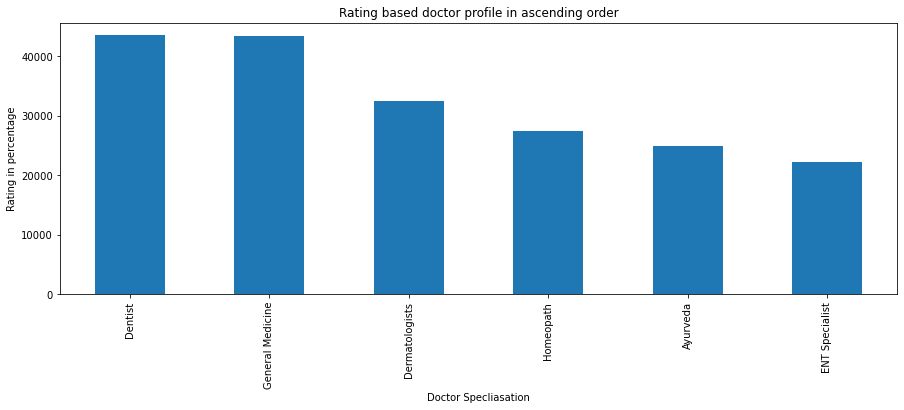

In [85]:
plt.subplots(figsize=(18,4))
test.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating based doctor profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Rating in percentage')
plt.show()

In [86]:
#1. we can observe the profile based on rating the best rating we can observe for Dentist followed by General medicine, and the least rating we can observe for ENT specialist


In [87]:
#Experience vs Profile

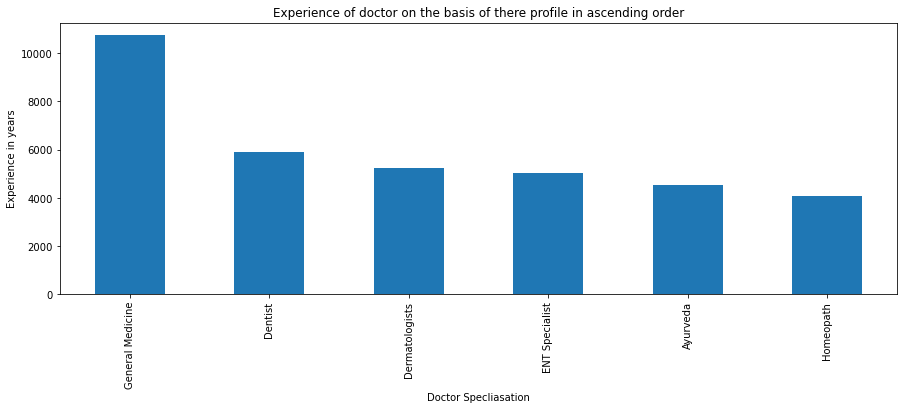

In [88]:
plt.subplots(figsize=(18,4))
test.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Experience of doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Experience in years')
plt.show()

In [89]:
# 1. we can oobserve the maximum experience doctor are from the background General Medicine. 2. where as the least experience we can observe for the Homeopath.


In [90]:
#Model Building


In [91]:
#Skewness

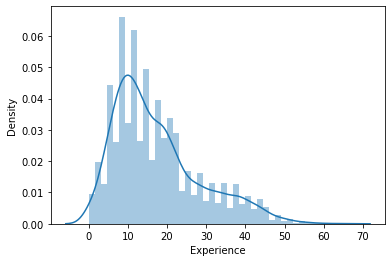

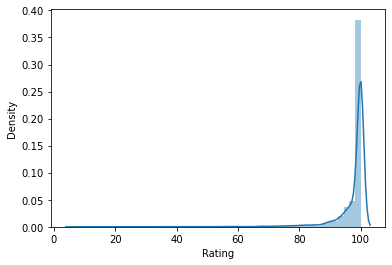

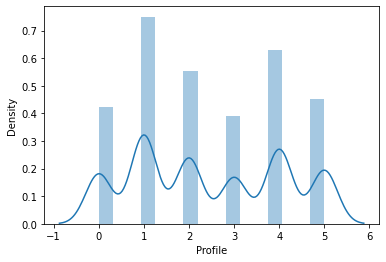

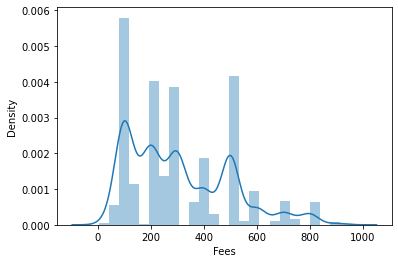

In [92]:
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

In [93]:
# Now let check the skewness and try to remove the skewness.
train.skew()
#observation: we can oberve the data is skewed.

Experience    0.991089
Rating       -4.701646
Profile       0.108803
Fees          0.751870
dtype: float64

In [95]:
#lets apply log transformation and treat the skewed data
for col in train.columns:
    if train.skew().loc[col]>0.55:
        train[col]=np.sqrt(train[col])

In [96]:
train.skew()

Experience    0.082582
Rating       -4.701646
Profile       0.108803
Fees          0.245176
dtype: float64

In [97]:
#Removing Outliers

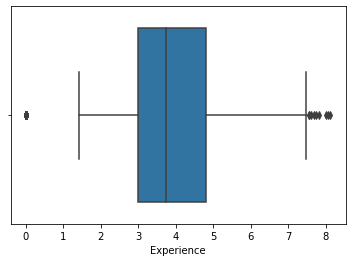

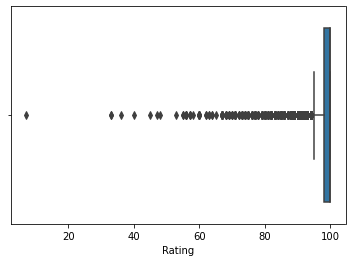

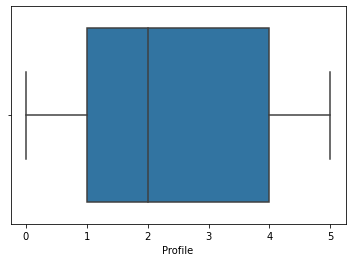

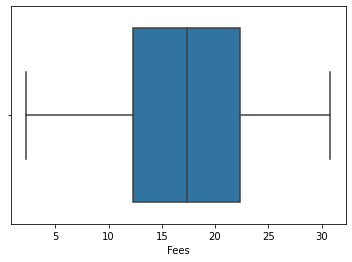

In [98]:
#lets plot the boxplot to identify the outliers.
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

In [99]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(train))
print(train.shape)
new=train.loc[(z<3).all(axis=1)]
print(new.shape)
# we can observe the new zscore down below.

(5961, 4)
(5821, 4)


In [100]:
#Training the model

In [103]:
#Lets apply various regression to predict the Deaths

In [101]:
# lets sepearate input output columns
df_x=new.drop(columns=['Fees']) # Input variable.
y=pd.DataFrame(new['Fees']) #Target Variable.

In [102]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()
# WE CAN NOTICE OUR DATA IS BEEN SCALED.


,Experience,Rating,Profile
0,0.733975,0.484987,1.541260
1,-0.329524,-0.083329,-1.454891
2,-0.673506,0.484987,0.342800
3,-0.329524,0.484987,-1.454891
4,0.417608,0.484987,-1.454891


In [104]:
#lets again check the skewness
x.skew()

Experience    0.086901
Rating       -2.697737
Profile       0.126566
dtype: float64

In [105]:
# let import diffrent model library
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#import ensemble technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor



#importing error matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [106]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('max r2 score correponding to',final_r_state,'is',max_r_score)
    print()
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean Squared error:',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('*******************************************************************')
    print()
    return final_r_state

In [107]:
model=[LinearRegression(),KNeighborsRegressor(),SVR(),GradientBoostingRegressor(),RandomForestRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    print('----->>',m,'<<-----')
    r_state=maxr2_score(m,x,y)

----->> LinearRegression() <<-----

max r2 score correponding to 99 is 0.06260063261624194

Error:
Mean absolute error: 4.420063444711879
Mean Squared error: 28.22529508751013
Root Mean Squared error: 5.312748355372211
*******************************************************************

----->> KNeighborsRegressor() <<-----

max r2 score correponding to 99 is 0.04536374061198045

Error:
Mean absolute error: 4.34631442541824
Mean Squared error: 28.74430158584997
Root Mean Squared error: 5.361371241189139
*******************************************************************

----->> SVR() <<-----

max r2 score correponding to 99 is 0.16629536343432005

Error:
Mean absolute error: 4.06822761210823
Mean Squared error: 25.103024603662035
Root Mean Squared error: 5.010291868111281
*******************************************************************

----->> GradientBoostingRegressor() <<-----

max r2 score correponding to 77 is 0.1749487827946058

Error:
Mean absolute error: 4.095925105418583
M

In [108]:
#lets cross validate all the model uing FOR loop.
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),KNeighborsRegressor(),SVR(),GradientBoostingRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    cvs=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Cross val score of',m,'is:')
    print('Cross val score is',cvs)
    print('Mean cross val score of',m,'is',cvs.mean())
    print('Standard deviation of',m,'is',cvs.std())
    print()
    print('*******************************************************************')

Cross val score of LinearRegression() is:
Cross val score is [0.02193288 0.04479331 0.05321    0.04383626 0.03230473 0.05249999
 0.03020776 0.04364052 0.05759042 0.04290911]
Mean cross val score of LinearRegression() is 0.0422924992554637
Standard deviation of LinearRegression() is 0.010623352804151727

*******************************************************************
Cross val score of KNeighborsRegressor() is:
Cross val score is [-0.09586826 -0.00802026  0.002324   -0.02346788 -0.0146777   0.0356623
  0.00278874 -0.06732292  0.0173299   0.00023098]
Mean cross val score of KNeighborsRegressor() is -0.015102109207409698
Standard deviation of KNeighborsRegressor() is 0.037226628352241053

*******************************************************************
Cross val score of SVR() is:
Cross val score is [0.11639553 0.10817707 0.14402998 0.1025982  0.1289636  0.15444599
 0.11108825 0.0720617  0.10132443 0.13887092]
Mean cross val score of SVR() is 0.1177955673195766
Standard deviation o

In [109]:
#1. From checking above we can conclude that Gradient boosting is working well among all but the RMSE score 5, any how lets check it with grid search cv and lets see the predicted output.

In [110]:
# lets check the best parameter using grid search cv.
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
# use n_estimator with step of 50
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("R2 Score for Ridge : ",r2_score(y_test,pred)*100)
print('Cross Validation Score for Ridge: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print()
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Ridge :  17.85735271444682
Cross Validation Score for Ridge:  14.15825999351243

Mean absolute error: 4.088227572626076
Mean Squared error: 24.62903877856138
Root Mean Squared Error : 4.962765235084305


In [112]:
#1. We can observe that the Gradient boosting is giving score of almost 18% 2. We can also observe that the Cross valid score is 14.15 which i can say gradient boosting is giving best result among all. lets save te model with gradient boosting regressor.

In [113]:

#lets test the model
doc_cons_fee=gbr.predict(x)

AxesSubplot(0.125,0.125;0.775x0.755)


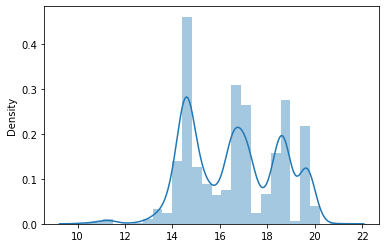

In [114]:
print(sns.distplot([doc_cons_fee]))

In [115]:
#lets save the predicted result to excel file.
ds=pd.DataFrame(doc_cons_fee)
ds.to_csv('doctor consultation fee.csv')

In [117]:
# lets Save the model
import joblib
joblib.dump(gbr,'doc consultation fee.csv')

['doc consultation fee.csv']